In [2]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [4]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


<Axes: xlabel='coin_id'>

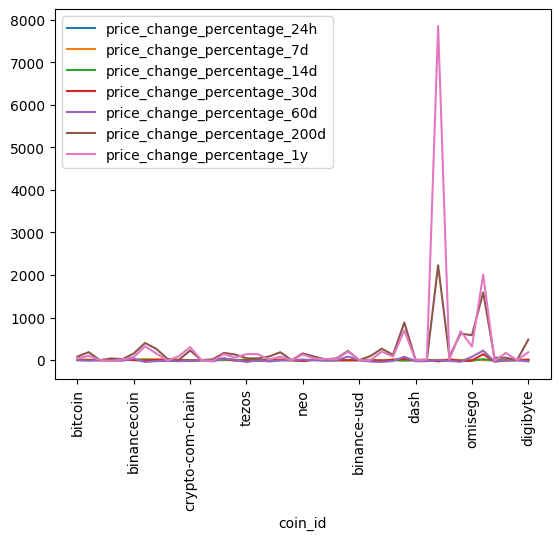

In [6]:
# Plot your data to see what's in your DataFrame
df_market_data.plot.line(
    rot=90
)

---

### Prepare the Data

In [7]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
market_scaled = StandardScaler().fit_transform(df_market_data[["price_change_percentage_24h",
                    "price_change_percentage_7d","price_change_percentage_14d", "price_change_percentage_30d",
                    "price_change_percentage_60d", "price_change_percentage_200d", "price_change_percentage_1y"]])

# Review the scaled data
market_scaled [0:5]

array([[ 0.50852937,  0.49319307,  0.77220043,  0.23545963, -0.0674951 ,
        -0.35595348, -0.25163688],
       [ 0.18544589,  0.93444504,  0.55869212, -0.05434093, -0.27348273,
        -0.11575947, -0.19935211],
       [ 0.02177396, -0.70633685, -0.02168042, -0.06103015,  0.00800452,
        -0.55024692, -0.28206051],
       [-0.04076438, -0.81092807,  0.24945797, -0.05038797, -0.37316402,
        -0.45825882, -0.29554614],
       [ 1.19303608,  2.00095907,  1.76061001,  0.54584206, -0.29120287,
        -0.49984776, -0.27031695]])

In [8]:
# Create a DataFrame with the scaled data
market_scaled_df = pd.DataFrame(market_scaled, columns=["price_change_percentage_24h",
                    "price_change_percentage_7d","price_change_percentage_14d", "price_change_percentage_30d",
                    "price_change_percentage_60d", "price_change_percentage_200d", "price_change_percentage_1y"])

# Copy the crypto names from the original data
market_scaled_df["coin_id"] = df_market_data.index

# Set the coinid column as index
market_scaled_df = market_scaled_df.set_index("coin_id")

# Display sample data
market_scaled_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Data.

In [9]:
# Create a list with the number of k-values from 1 to 11
k= list(range(1,11))

In [55]:
# Create an empty list to store the inertia values

inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
for i in k:

# 2. Fit the model to the data using `df_market_data_scaled`
    k_model = KMeans(n_clusters=i, random_state=1)
    k_model.fit(market_scaled_df)

# 3. Append the model.inertia_ to the inertia list
inertia.append(k_model.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [57]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k, "inertia": inertia2}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

# Review the DataFrame
df_elbow.head()

,k,inertia
0,1,287.007838
1,2,196.268358
2,3,111.972027
3,4,43.205879
4,5,33.042435


<Axes: title={'center': 'Elbow Curve'}, xlabel='k'>

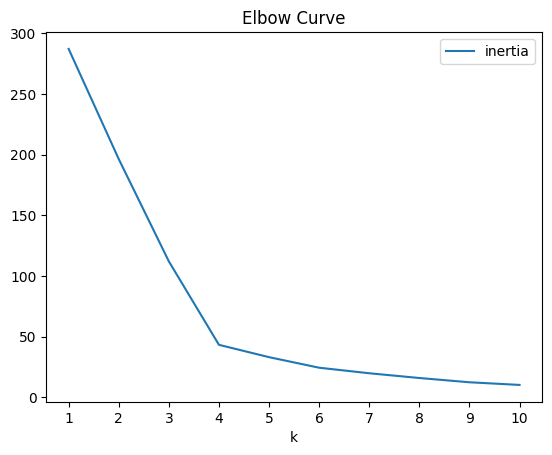

In [46]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
df_elbow.plot.line(
    x="k",
    y="inertia",
    title="Elbow Curve",
    xticks=k
)


#### Answer the following question:

**Question:** What is the best value for `k`?

**Answer:**
The best value for K is 4.

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [19]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4, random_state=1)

In [20]:
# Fit the K-Means model using the scaled data
model.fit(market_scaled_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=1)

In [21]:
# Predict the clusters to group the cryptocurrencies using the scaled data
k_4 = model.predict(market_scaled_df)

# Print the resulting array of cluster values.
print(k_4)

[3 3 1 1 3 3 3 3 3 1 1 1 1 3 1 3 1 1 3 1 1 3 1 1 1 1 1 1 3 1 1 1 0 3 1 1 2
 1 1 1 1]


In [22]:
# Create a copy of the DataFrame
market_predictions_df = market_scaled_df.copy()

market_predictions_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


In [23]:
# Add a new column to the DataFrame with the predicted clusters
market_predictions_df["predicted_cluster"] = k_4

# Display sample data
market_predictions_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,predicted_cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,3
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,3
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,1
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,1
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,3


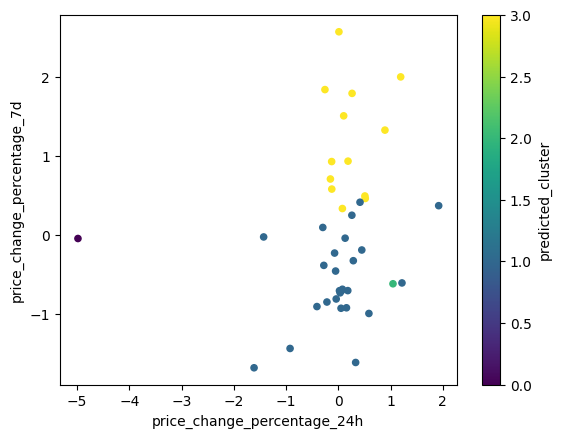

In [33]:
market_predictions_df.plot.scatter('price_change_percentage_24h','price_change_percentage_7d',c="predicted_cluster", colormap='viridis')
plt.show()

---

### Optimize Clusters with Principal Component Analysis.

In [34]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [35]:
# Use the PCA model with `fit_transform` to reduce to
# three principal components.
market_data_pca = pca.fit_transform(market_predictions_df)

# View the first five rows of the DataFrame.
market_data_pca[: 5]

array([[-1.58513942,  0.13439444,  0.545621  ],
       [-1.32258066,  0.05449393,  1.11570854],
       [ 0.26633536, -0.53640937, -0.79694588],
       [ 0.25722513, -0.59201286, -0.6465287 ],
       [-2.95224985,  0.42237155,  1.26789353]])

In [36]:
# Retrieve the explained variance to determine how much information
# can be attributed to each principal component.
pca.explained_variance_ratio_

array([0.37005408, 0.32322221, 0.19115222])

In [37]:
sum(pca.explained_variance_ratio_)

0.8844285111826465

#### Answer the following question:

**Question:** What is the total explained variance of the three principal components?

**Answer:**

In [38]:
# Create a new DataFrame with the PCA data.
market_pca_df = pd.DataFrame(
    market_data_pca,
    columns = ["PC1", "PC2", "PC3"]
)

# Copy the crypto names from the original data
market_pca_df['coin_id'] = df_market_data.index


# Set the coinid column as index
market_pca_df = market_pca_df.set_index("coin_id")

# Display sample data
market_pca_df.head()

,PC1,PC2,PC3
coin_id,,,
bitcoin,-1.585139,0.134394,0.545621
ethereum,-1.322581,0.054494,1.115709
tether,0.266335,-0.536409,-0.796946
ripple,0.257225,-0.592013,-0.646529
bitcoin-cash,-2.952250,0.422372,1.267894


---

### Find the Best Value for k Using the PCA Data

In [40]:
# Create a list with the number of k-values from 1 to 11
k = list(range(1, 11))

In [41]:
# Create an empty list to store the inertia values
inertia2 = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:

# 1. Create a KMeans model using the loop counter for the n_clusters
for i in k:

# 2. Fit the model to the data using `df_market_data_pca`
    k_model = KMeans(n_clusters=i, random_state=1)
    k_model.fit(market_pca_df)

# 3. Append the model.inertia_ to the inertia list
    inertia2.append(k_model.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [43]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data2 = {"k": k, "inertia": inertia2}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow2 = pd.DataFrame(elbow_data2)

# Review the DataFrame
df_elbow2.head()

,k,inertia
0,1,287.007838
1,2,196.268358
2,3,111.972027
3,4,43.205879
4,5,33.042435


<Axes: title={'center': 'Elbow Curve'}, xlabel='k'>

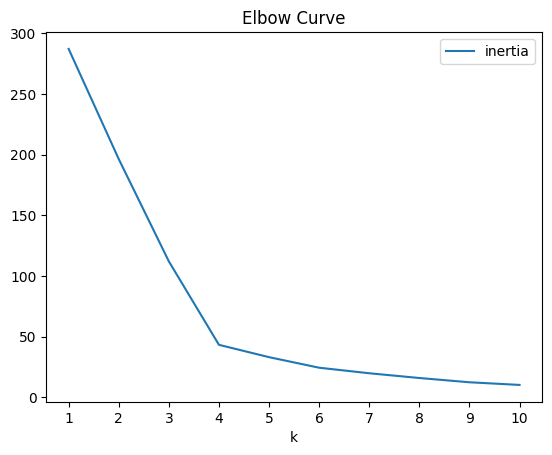

In [47]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
df_elbow2.plot.line(
    x="k",
    y="inertia",
    title="Elbow Curve",
    xticks=k
)


#### Answer the following questions:

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:**


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:**

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [48]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4, random_state=1)

In [49]:
# Fit the K-Means model using the PCA data
model.fit(market_pca_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=1)

In [50]:
# Predict the clusters to group the cryptocurrencies using the PCA data
clusters_predition = model.predict(market_pca_df)

# Print the resulting array of cluster values.
print(clusters_predition)

[1 1 0 0 1 1 1 1 1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 2 1 0 0 3
 0 0 0 0]


In [51]:
# Create a copy of the DataFrame with the PCA data
clusters_predition_df= market_pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters
clusters_predition_df['clusters_predition'] = clusters_predition

# Display sample data
clusters_predition_df.head()

,PC1,PC2,PC3,clusters_predition
coin_id,,,,
bitcoin,-1.585139,0.134394,0.545621,1
ethereum,-1.322581,0.054494,1.115709,1
tether,0.266335,-0.536409,-0.796946,0
ripple,0.257225,-0.592013,-0.646529,0
bitcoin-cash,-2.952250,0.422372,1.267894,1


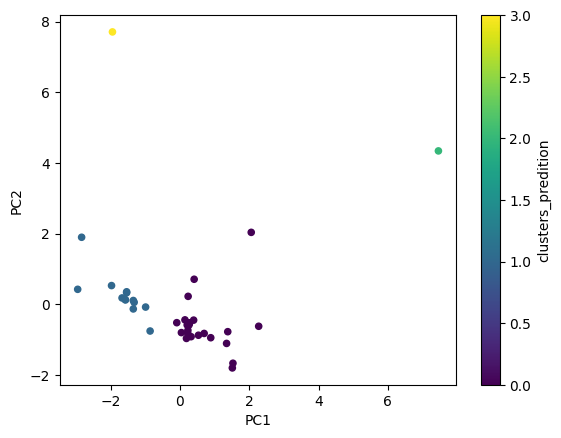

In [52]:
# Create a scatter plot using hvPlot by setting
# `x="PC1"` and `y="PC2"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.
clusters_predition_df.plot.scatter('PC1','PC2', c='clusters_predition', colormap='viridis')
plt.show()

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

TypeError: ignored

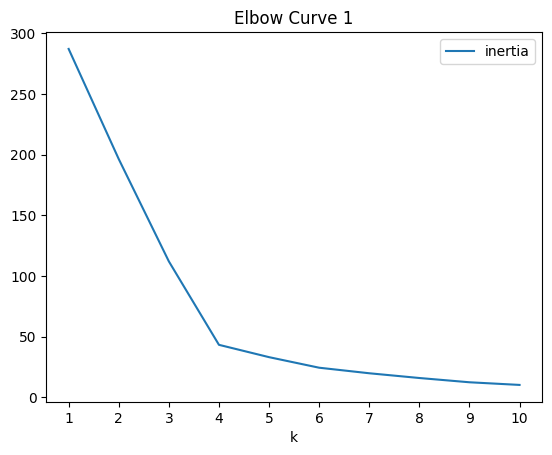

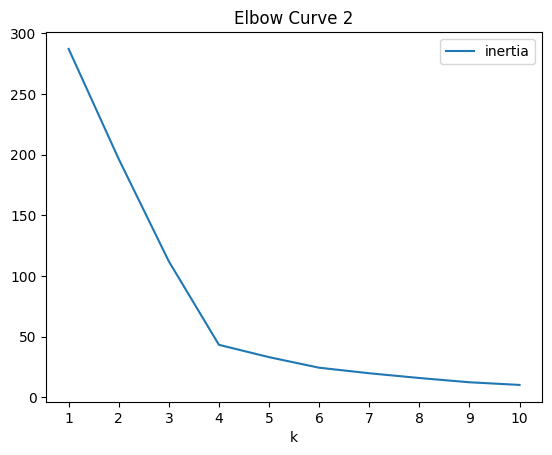

In [62]:
# Composite plot to contrast the Elbow curves

df_elbow.plot.line(x="k", y="inertia", title= "Elbow Curve 1", xticks=k) + df_elbow2.plot.line(x="k", y="inertia", title= "Elbow Curve 2", xticks=k)

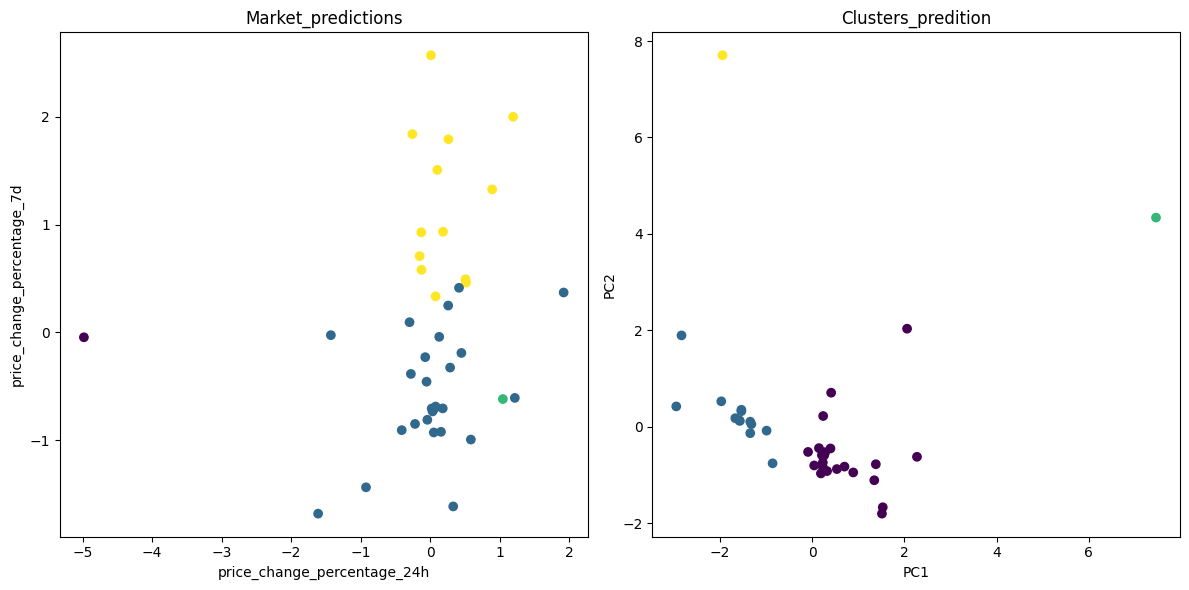

In [65]:
# Composite plot to contrast the clusters
# YOUR CODE HERE!

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].scatter(market_predictions_df['price_change_percentage_24h'], market_predictions_df['price_change_percentage_7d'],
                c=market_predictions_df['predicted_cluster'], cmap='viridis')
axes[0].set_xlabel('price_change_percentage_24h')
axes[0].set_ylabel('price_change_percentage_7d')
axes[0].set_title("Market_predictions")


axes[1].scatter(clusters_predition_df['PC1'], clusters_predition_df['PC2'], c=clusters_predition_df['clusters_predition'], cmap='viridis')
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('Clusters_predition')

plt.tight_layout()
plt.show()

#### Answer the following question:

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:**
Cluster Scatter Plot Comparison:

Cluster Graph 1 (using original data): The clusters are overlapping, and there is no clear separation or distinct clusters. This suggests that using the original data, with more features, may not have effectively captured the underlying patterns.

Cluster Graph 2 (using PCA data): The clusters in this graph are not overlapping, and there is clear separation and well-defined clusters.  This indicates that using fewer features (through PCA) has potentially reduced noise and helped reveal more distinct patterns in the data, leading to more meaningful and separable clusters.